In [2]:
import pandas as pd 
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import datetime as dt

In [3]:
summer_path = "datums/summer.csv"
winter_path = 'datums/winter.csv'
dictionary_path = 'datums/dictionary.csv'
baby_names_path = 'datums/NationalNames.csv'



In [4]:
#combine summer and winter into one table. add season column. 
summer_df = pd.read_csv(summer_path)
winter_df = pd.read_csv(winter_path)

summer_df['Season'] = "Summer"
winter_df['Season'] = "Winter"

olympic_df = summer_df.append(winter_df)

#filter by years in the baby names database
olympic_df = olympic_df[olympic_df['Year'] >= 1896]
olympic_df = olympic_df[olympic_df['Year'] <= 2015]

#get first names from the Athelete column
olympic_df['FirstName'] = olympic_df.Athlete.str.split(",",expand = True)[1]

olympic_df['FirstName'] = olympic_df.FirstName.str.split(expand = True)[0]

olympic_df['Initial'] = olympic_df.FirstName.str.find(".")

olympic_df = olympic_df[olympic_df["Initial"] == -1]

olympic_df = olympic_df.drop("Initial", axis=1)

olympic_df

olympic_df.to_csv("Output/olympics.csv", index = False)

In [5]:
UniqueFirst = list(olympic_df.FirstName.unique())

In [8]:
baby_df = pd.read_csv(baby_names_path)
# baby_df = baby_df[baby_df["Name"].isin(UniqueFirst)]
# baby_df.to_csv("Output/babynameslimit.csv", index = False)
# baby_df

In [9]:
baby = baby_df.groupby(['Name','Year'])["Count"].sum()

baby.to_csv("Output/babynames.csv", index = True)

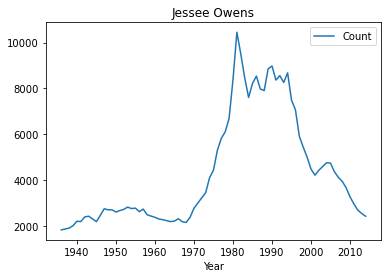

In [10]:
#jessee owens graph

jessie = olympic_df[olympic_df['Athlete'] == 'OWENS, Jesse']

jessee_df = baby_df[(baby_df['Name'] == "Jesse") & (baby_df['Year'] >= 1936) & (baby_df['Gender'] == 'M')]
jessee_df.plot(x='Year', y='Count')
plt.title("Jessee Owens")
plt.savefig("Images/JesseeOwens.png")
plt.show()


            Id    Name  Year Gender  Count
644504  644505  Apollo  1965      M      6
693768  693769  Apollo  1969      M     15
723569  723570  Apollo  1971      M     14
739949  739950  Apollo  1972      M      8
754732  754733  Apollo  1973      M     12


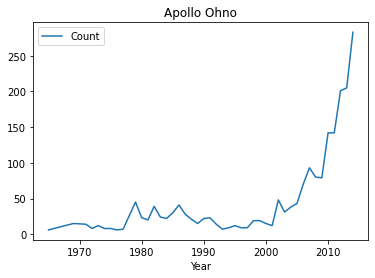

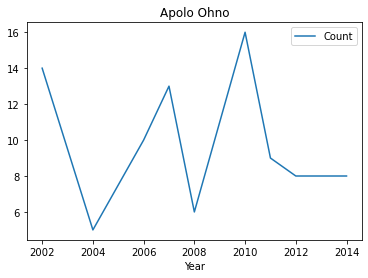

In [11]:
#Apolo Ohno graph
apolo_df = baby_df[(baby_df['Name'] == "Apollo") & (baby_df['Year'] >= 1910) & (baby_df['Gender'] == "M") ]
apolo_df.plot(x='Year', y='Count')
plt.title("Apollo Ohno")
plt.savefig("Images/ApolloOhno.png")
plt.show()

apolo_df = baby_df[(baby_df['Name'] == "Apolo") & (baby_df['Year'] >= 1910) & (baby_df['Gender'] == "M")]
apolo_df.plot(x='Year', y='Count')
plt.title("Apolo Ohno")
plt.savefig("Images/ApoloOhno.png")
plt.show()

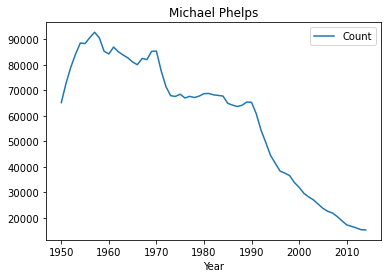

In [12]:
michael_df = baby_df[(baby_df['Name'] == "Michael") & (baby_df['Year'] >= 1950) & (baby_df['Gender'] == "M")]
michael_df.plot(x='Year', y='Count')
plt.title("Michael Phelps")
plt.savefig("Images/MichaelPhelps.png")
plt.show()

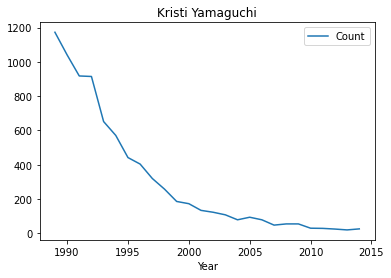

In [13]:
#Christi Yamaguchi 
Christi_df = baby_df[(baby_df['Name'] == "Kristi") & (baby_df['Year'] >= 1989)]
Christi_df.plot(x='Year', y='Count')
plt.title("Kristi Yamaguchi")
plt.savefig("Images/KristiYamaguchi.png")
plt.show()


In [67]:
#gold medal winners and baby bump in baby names 
#make a graph where there are line saying when people of that name won olympic medals. 
#see if there's any spot-test kind of correlation. 

olympic_names_M = ["John", "Robert", "Vladimir", "William", "Charles"]
olympic_names_F = ["Elena", "Maria", "Olga", "Anna", "Svetlana"]

for name in olympic_names_M:

    temp_df = baby_df[(baby_df['Name'] == name) & (baby_df['Gender'] == "M")]
    temp_df.plot(x='Year', y='Count')
    plt.title(name)
    plt.legend("")
    olympic_medal_dates = olympic_df[olympic_df['FirstName'] == name]
    years_list = list(olympic_medal_dates['Year'])
    

    for year in years_list:

        plt.axvline(year, linewidth=1, ymax=.75, color="tab:orange")
        plt.savefig(f"Images/{name}.png")

for name in olympic_names_F:

    temp_df = baby_df[(baby_df['Name'] == name) & (baby_df['Gender'] == "F")]
    temp_df.plot(x='Year', y='Count')
    plt.title(name)
    plt.legend("")
    olympic_medal_dates = olympic_df[olympic_df['FirstName'] == name]
    years_list = list(olympic_medal_dates['Year'])
    

    for year in years_list:

        plt.axvline(year, linewidth=1, ymax=.75, color="tab:orange")
        plt.savefig(f"Images/{name}.png")


KeyboardInterrupt: 